# Predicting Loan Status 
------

### CMSC 320 Final Project 

Sashank Thupukari, Ravi Kemburu, Rachit Agarwal

------

# 1) Introduction 
-----

The US economy is driven by lending and spending – trillions of dollars are borrowed, paid interest upon, and paid back. 

Over the last decade, there has been considerable growth in the Alternative Finance industry. According to [Wikipedia entry on Alternative Finance](https://en.wikipedia.org/wiki/Alternative_finance): 

> Alternative finance refers to financial channels and instruments that have emerged outside of the traditional finance system such as regulated banks and capital markets. Examples of alternative financing activities through 'online marketplaces' are reward-based crowdfunding, equity crowdfunding, peer-to-peer consumer and business lending, invoice trading third party payment platforms.

In 2017, there has been a massive shift in the Alternative Finance industry towards marketplace, or peer-to-peer (P2P) lending. According to [Business Insider](http://www.businessinsider.com/major-shifts-in-us-alt-lending-market-2017-6): 

> Marketplace, or peer-to-peer (P2P), consumer lending still holds the most market share (61%) with origination volumes hitting \$21.1 billion in 2016, up 17% from $18 billion in 2015.

<img src="peer-to-peer.png" style="width: 50%;"/>

<br>

In this analysis, we explore historical data from an [Kaggle data set](https://www.kaggle.com/zaurbegiev/my-dataset) representing the data of an unknown peer-to-peer loan originator. One of the mission critical aspects to a peer-to-peer loan business is to determine the likelihood of a customer returning the money they lend to him/her. If the company is accurately able to discriminate trustworthy lenders, they will recieve their money + interest back, and turn a profit. If they incorrectly lend money to untrustorthy lenders, they will recieve neither their money or the required interest, and proceed to lose _a lot_ of money. 

Data Science is a powerful field, having uses from protecting against malware to stopping diseases. However as a relatively new field, many people are not aware of the extent of what data science can achieve. The powerful finance industry as one example suffers from a plethora of problems, from fraud to money laundering to simply managing money, problems that can be solved with the use of data science. This tutorial utilizes some of the most powerful data science techniques to demonstrate the power it has. Our hope is that the finance industry will recognize and help drive the widespread adoption and usage of data science to solve real world problems across society.

We will go through: 

- Curating the data
- Parsing and tidying the data
- Analyze various trends and correlations in the data
- Attempt to train a model that can predict whether a lender will default on their loan.

### 1.1 Setup and Installation


**Libraries**:

We will be working with the following libraries. Below are the library names, installation command, and introductory tutorials if you are not familiar with any of the libaries.

**Libary**|** Tutorial**|** Installation**
:-----|:-----|:-----
Pandas| https://pandas.pydata.org/pandas-docs/stable/tutorials.html| `pip install pandas`
NumPy| https://docs.scipy.org/doc/numpy-dev/user/quickstart.html| `pip install numpy`
MatPlotLib| https://matplotlib.org/| `pip install matplotlib`
Plotly| https://plot.ly/| `pip install plotly`
Scikit-Learn| http://scikit-learn.org/stable/| `pip install scikit-learn`

**Import**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')

# 2) Data Curation
----

We can download the dataset directly from Kaggle here: [link](https://www.kaggle.com/zaurbegiev/my-dataset)

There are two files, `credit_train.csv` and `credit_test.csv`. For the exploratory analysis, we will be working with the training set. We will use the test set to validate our machine learning model later in this analysis. 

### 2.1 Loading Dataset

We create first load the csv into a Pandas dataframe, and preview the dataframe:

In [2]:
file_path = "./CreditData.csv"
df = pd.read_csv(file_path, sep=',')

df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score Raw,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,258082,Short Term,746.0,746.0,950475.0,4 years,Rent,Debt Consolidation,6748.42,11.5,NaN,12,0,330429,815782.0,0.0,0.0
1,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,541486,Long Term,NaN,NaN,NaN,6 years,Rent,Business Loan,10303.51,17.6,73.0,7,0,268337,372988.0,0.0,0.0
2,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,742.0,1230440.0,3 years,Home Mortgage,Debt Consolidation,11073.96,26.8,NaN,11,0,168720,499642.0,0.0,0.0
3,00045ecd-59e9-4752-ba0d-679ff71692b3,b7bce684-b4b0-4b29-af66-eae316bce573,Fully Paid,260986,Short Term,734.0,734.0,1314838.0,10+ years,Own Home,Debt Consolidation,16325.94,30.3,NaN,7,0,189221,373890.0,0.0,0.0
4,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,301818,Short Term,NaN,NaN,NaN,1 year,Own Home,Home Improvements,14770.22,13.6,2.0,12,0,127680,1173370.0,0.0,0.0


### 2.2 Cleaning and Tidying 

Now that we have the dataset loaded into Pandas, we can begin to easily manipulate and transform the data. First, we want to clean up the dataset. 

We can get rid of the `Load ID` and `Customer ID` columns, because they have no usefulness to our analysis. We also will remove the `Credit Score Raw` column as it is redundant with the `Credit Score` column.

In [3]:
df = df.drop(['Loan ID', 'Customer ID', "Credit Score Raw"], axis=1)

We also notice that the very bottom rows of the data are completely filled with garbage data (`NAN`). We can limit the dataframe to the first 100,000 rows, which are valid, to create a complete, valid dataset.

In [4]:
df = df.iloc[:99999]

Aweome! We have now cleaned up our dataset by getting rid of data that isn't useful or invalid. However, we can see that even the first 100,000 rows have many `NaN` values for some of the columns. 

To better understand where we have missing data, we can count the number of `NaN` fields we have across the various columns. We see here that they are in the `Credit Score`, `Annual Income`, `Years in current job`, `Months since last delinquent`, and `Bankruptcies` columns. 

In [5]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

**Imputation** 

To explore the data and later make an accurate model, we need to try to account for thse `NaN` values. 

There are several approaches to handling these `NaN` values. This process is called [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics). For a comprehensive overview, here is a guide from "The Analysis Factor" about [Seven Ways to Make up Data: Common Methods to Imputing Missing Data](https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/). 

Let's examine how we'll handle each column's missing data one by one:

- **Credit Score, Annual Income, and Years in Current Job **

    We can assume that credit score will be one of the most important features in the model we train, as it is a single number that comprehensively represents the quality of a lender. 
    
    Unfortunately, we can't try a simple solution, such as using the mean credit score, since this would throw off our results – people with characteristics of a risky lender would be given a higher credit score than they deserve, and vice versa for trustworthy lenders. We also can't easily use a hot-deck imputation, since we don't have enough information and history to make accurate subsutition. Therefore, the best course of action is to simply drop the rows with a missing credit score.
    
    The same logic applies for Annual Income and Years in Current Job. 
    
    
- ** Months since last delinquent **

    A `NaN` value here simply means that the individual has never defaulted on a debt before. We can replace these `NaN`values with a large value. We will use `720 months`, which is `12 months/year` * `60 years`
 
 
- ** Bankruptcies ** 

    Bankruptcies, like credit score, are another feature tha will play a large roal in determining loan approval. These values would be very hard to impute since there is too much history and too many factors involved. Since there are only 204 rows with `NaN` bankruptcies, we can just drop them. 
    

- ** Maximum Open Credit **

    There are only two rows missing this fields. We can just drop them. 

In [6]:
# Drop NaN rows for Credit Score, Annual Income, and Maximum Open Credit
df = df.dropna(subset=['Credit Score','Annual Income', 'Years in current job', 
                       'Bankruptcies', 'Maximum Open Credit'])

# Set Month since last delinquent to 12 * 60
df['Months since last delinquent'].fillna(720, inplace=True)

df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Now we have no `NaN` data! We can see the final size of our datset:

In [7]:
df.shape

(77270, 17)

** Years in current job **

The `Years in current job` column has the word "years" and the symbols "<" and "+" in the values. 

In [8]:
df["Years in current job"].unique()

array(['4 years', '3 years', '10+ years', '2 years', '5 years', '1 year',
       '6 years', '< 1 year', '7 years', '8 years', '9 years'], dtype=object)

We would like these values to be integers so we can better analyze this column and use it when we train our model. We will set 10+ years to 10 years, and < 1 years to 0 years.

In [9]:
def extract_year_number(s):
    if "<" in s:
        return 0
    elif "+" in s:
        return 10
    else:
        return int(s[0])
    
df["Years in current job"] = df["Years in current job"].map(extract_year_number)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,258082,Short Term,746.0,950475.0,4,Rent,Debt Consolidation,6748.42,11.5,720.0,12,0,330429,815782.0,0.0,0.0
2,Fully Paid,99999999,Short Term,742.0,1230440.0,3,Home Mortgage,Debt Consolidation,11073.96,26.8,720.0,11,0,168720,499642.0,0.0,0.0
3,Fully Paid,260986,Short Term,734.0,1314838.0,10,Own Home,Debt Consolidation,16325.94,30.3,720.0,7,0,189221,373890.0,0.0,0.0
6,Fully Paid,353760,Long Term,692.0,1202985.0,10,Rent,Debt Consolidation,6115.15,13.8,720.0,10,0,173394,300564.0,0.0,0.0
7,Fully Paid,31526,Short Term,716.0,2065965.0,10,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22,0,526414,1090386.0,0.0,0.0


# 3) Exploratory Data Analysis 

Before we can start diving into anything too intensive, with almost 100,000 data points, it will help us to draw some visualizations to understand the data and test some hypothesis. We can explore some graphs of various attributes and compare them to default rates. 

## 3.1 Loan Status

First, lets examine the main feature of this entire analysis: Loan Status. The Loan Status is either "Fully Paid" or "Charged Off". The later means the lender defaulted. We want to be able to predict which category a lender will fall under.

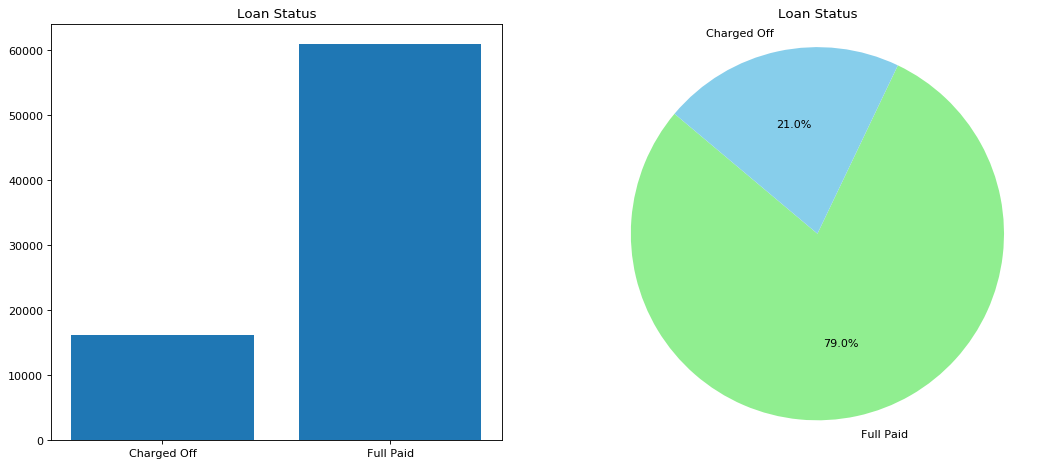

In [10]:
loan_status = df["Loan Status"].value_counts()

labels = ["Full Paid", "Charged Off"]
colors = ["lightgreen", "skyblue"]


'''
Plot Data
'''
%matplotlib inline

fig = plt.figure(num=None, figsize=(16, 40), dpi=80, facecolor='w', edgecolor='k')

# Bar Chart
ax = fig.add_subplot(5, 2, 1)
ax.bar(labels, loan_status)
ax.set_title('Loan Status')

# Pie chart
ax = fig.add_subplot(5, 2, 2)
ax.pie(loan_status, labels=labels,colors = colors,
        autopct='%1.1f%%', startangle=140)
ax.axis('equal')
ax.set_title('Loan Status')

plt.show()

We can see in the pie chart that a significant portion (over 20%) of loans were charged off. We also have a lot more datapoints for fully-paid loans. 

## 3.2 Data Exploration Methodology

To begin looking at correlations, we will define a methodology to visualize how each feature affects loan default rates. 

Since many of our features are **continuous**, we will want to seperate the features into **bins**. For example, monthly debt is a continous value that can range from \$0 to multiple hundred thousand dollars. To understand how a continous feature, like monthly debt, affects loan default rates, we will: 

1. Observe the distribution of the continuous values
2. Seperate the values into bins of equal size based on the distribution
3. Count and visualize the number of "Fully Paid" and "Charged Off" loans are in each bin
4. Calculate and visualize the % of loans that were "Fully Paid" in each bin.  

We'll also define two filtered dataframes: one for "Full Paid" and one for "Charged Off", and resize our plots to a healthy size. 

In [11]:
df_paid = df[df['Loan Status'] == "Fully Paid"]
df_default = df[df['Loan Status'] == "Charged Off"]

In [12]:
def resize(x=18,y=8): 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

### 3.2.1 Monthly Debt

We will first look at Monthly Debt vs. default rate. Following our methodology defined above, we first look at the distribution (histogram) of monthly debts, which will aid us in creating bins. 

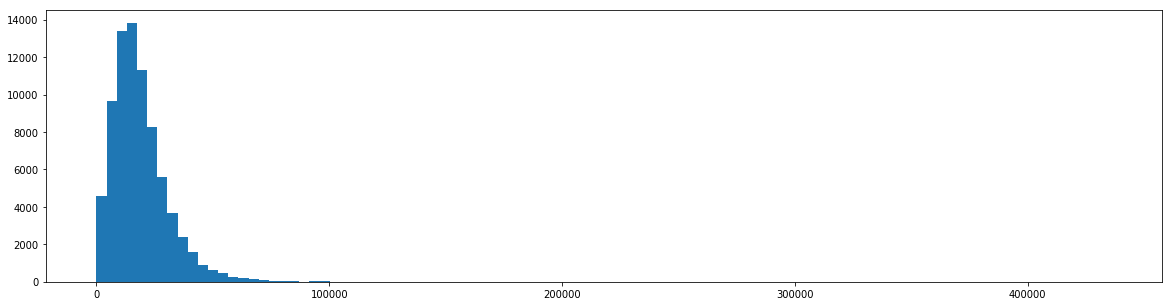

In [13]:
resize(x=20, y=5)
plt.hist(df["Monthly Debt"], bins=100)
plt.show()

We observe that most monthly debts lie in the \$0 - \$100,000 range. Therefore, let us separate the values into $5000 bins in that range. 

Below, we also define a generic grouped column grapher that takes in a column name, a min and max value, and a binwidth, and will graph: 

1. A distribution of the value that stacks "Fully Paid" and "Charged Off" Loans for each bin

2. The percentage of loans that were "Fully Paid" out of the total for each bin.

We can use this function to analyze other columns later.

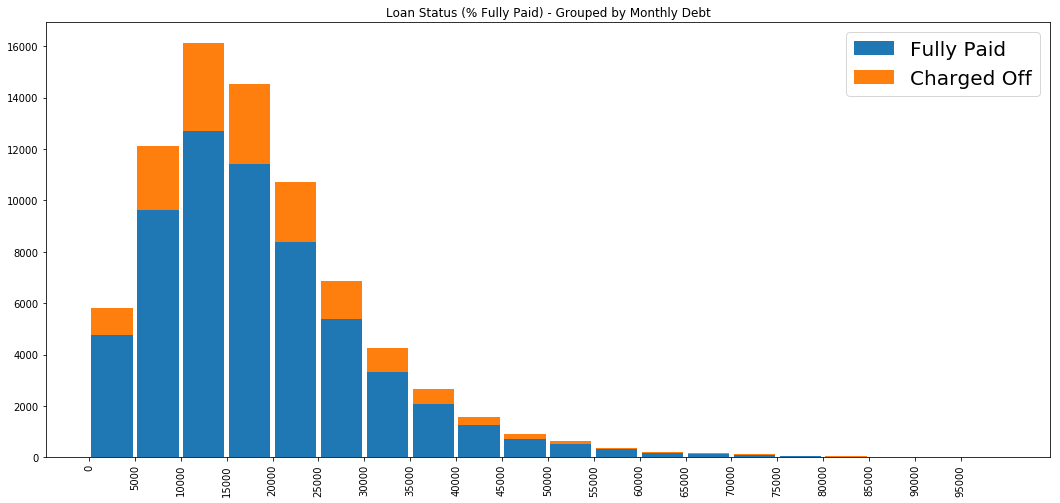

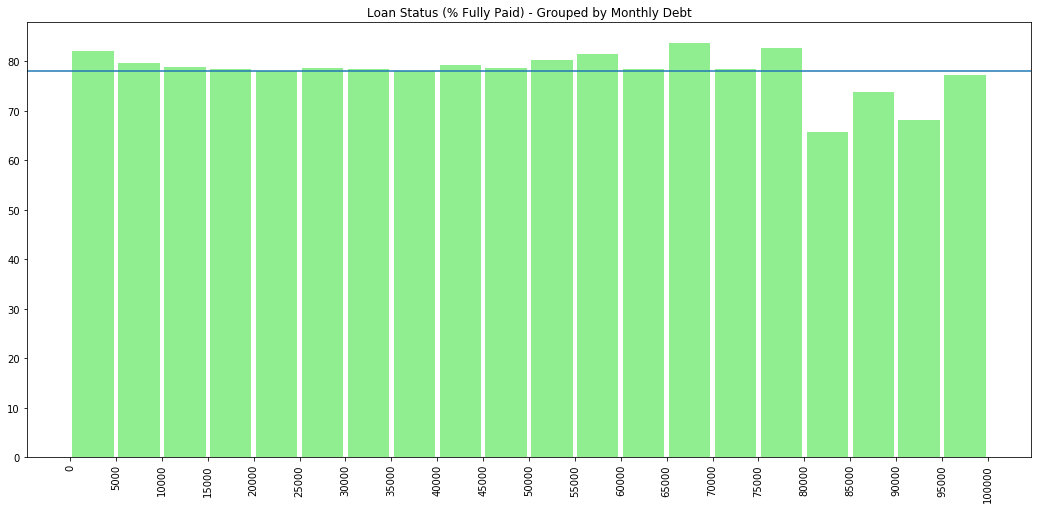

In [14]:
%matplotlib inline

# Define generic grouped column grapher 
# which we can use for any column
def graph_grouped_column(column, min_value, max_value, binwidth):
    '''
    Plot Loan Status grouped by Monthly Debt
    '''
    
    resize(y=8)
    values, bins, patches = plt.hist([df_paid[column],df_default[column]] , 
             stacked=True, rwidth=0.9, 
             label=["Fully Paid", "Charged Off"],
             bins=range(min_value, max_value + binwidth, binwidth))
    
    plt.title("Loan Status (% Fully Paid) - Grouped by {0}".format(column))
    plt.xticks(range(min_value,max_value, binwidth),  rotation='vertical')
    plt.legend(prop={'size':20})
    plt.show()

    '''
    Plot % Fully Paid grouped by Monthly Debt
    '''
    
    resize(y=8) 
    percentages = [paid/total*100 for (paid, total) in zip(*values)]
    plt.axhline(y=np.mean(percentages))
    width = 0.9 * binwidth
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, percentages, width=width ,color="lightgreen")
    plt.title("Loan Status (% Fully Paid) - Grouped by {0}".format(column))
    plt.xticks(bins, rotation='vertical')
    plt.show()
    
# Graph Monthly Debt, in range 0 - 100000, with bins of size 5000
graph_grouped_column("Monthly Debt", min_value=0, max_value=100000, 
                     binwidth=5000)

When initially observing the first plot, we see that, across all ranges, that most of the loans are fully paid – no bin has more unpaid than paid loans. We also see that there are many loans in the \$10,000 - $20,000 range, and this range has the most number of defaults.

However, when we look at the second plot, we see that the percentage of paid loans that are paid across ranges is fairly constant, and it is in fact the higher ranges that have a lower than average paid % rate. 

This indicates that there might be little correlation between monthly debt and whether the loan is paid. 

### 3.2.2 Credit Score

Next, we will look at Credit Score vs. default rate. We again follow the methodology we defined ealier. 

The distribution (histogram) of credit scores: 

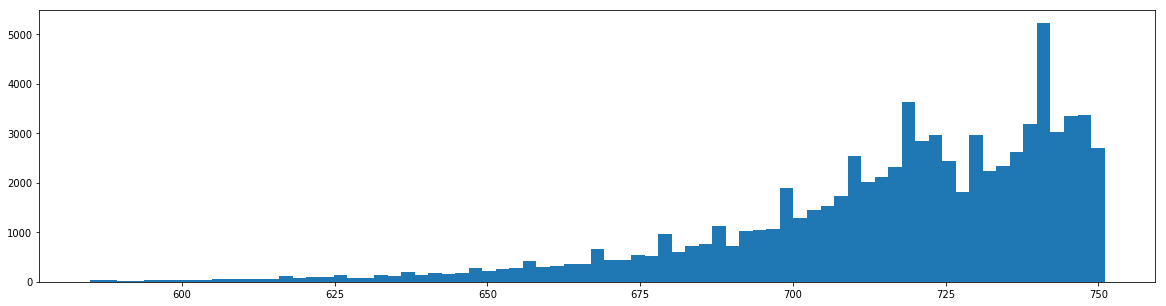

In [15]:
resize(x=20, y=5)
plt.hist(df["Credit Score"], bins=75)
plt.show()

It looks like the credit scores in our dataset are relatively high, ranging from 550 to 750, with most in the 700-750 range. Since the range here is smaller than monthly debts and smaller credit scores are probably significant by intuition, we'll use the entire credit score range for our plots.

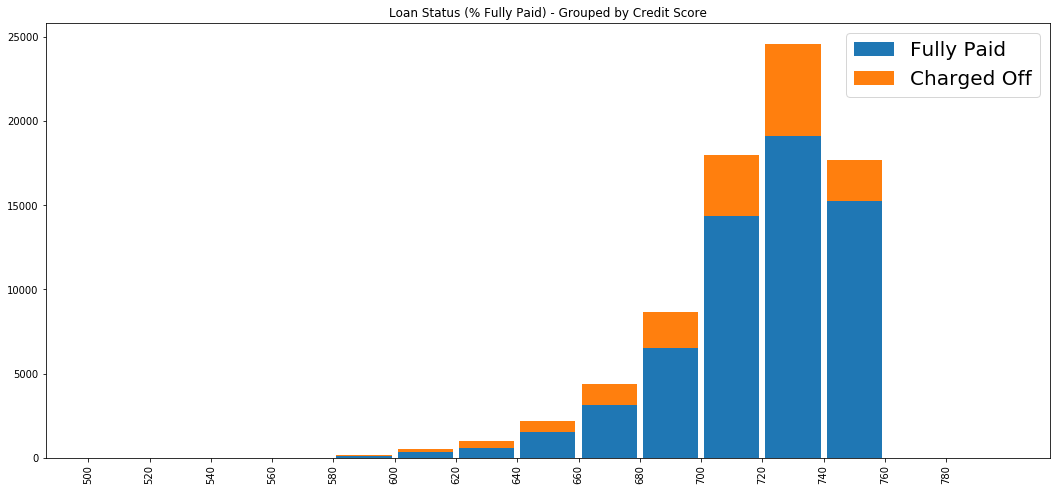

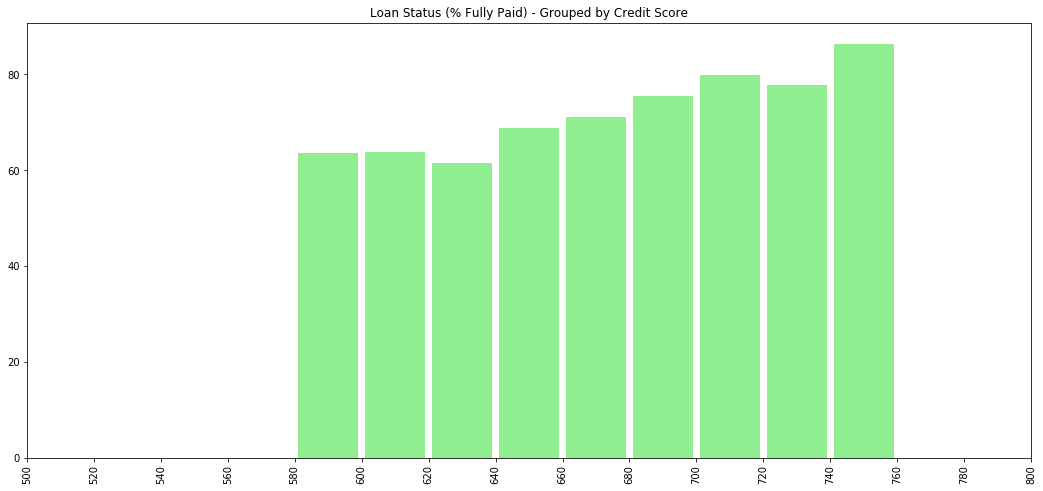

In [16]:
graph_grouped_column("Credit Score", min_value=500, max_value=800, 
                     binwidth=20)

Most lenders have a credit score in the 720 - 740 range. As expected, there is a positive correlation between credit score and % Fully Paid – higher credit scores have a higher percentage of fully paid loans. 

This indicates that a credit score is a good indicator of whether someone will default on their loan. Intuitively, this makes sense, since low credit score means that the lender has defaulted or missed payments on other debts in the past.

### 3.2.3 Annual Income

Next, we will look at Annual Income vs. default rate. We again follow the methodology we defined ealier. 

The distribution (histogram) of credit scores: 

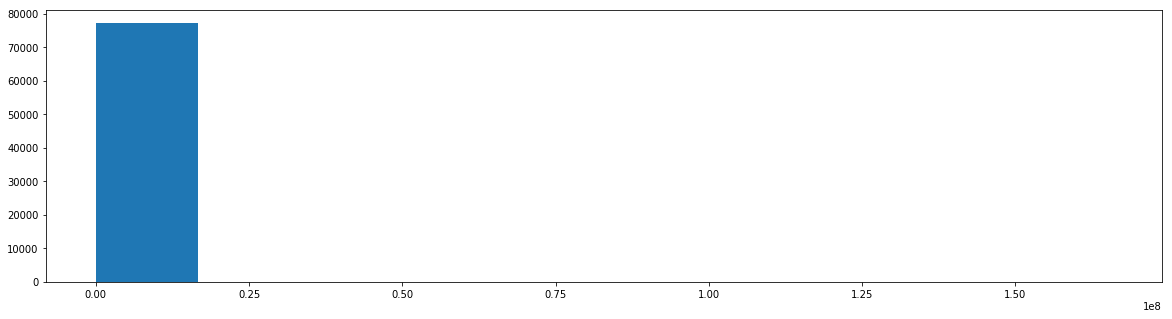

In [17]:
resize(x=20, y=5)
plt.hist(df["Annual Income"], bins=10)
plt.show()

Looks like most of the income data points are under $2.5 million -- this is still a huge range. Let's dig deeper to get a more accurate range for a majority of the data, if there is one.

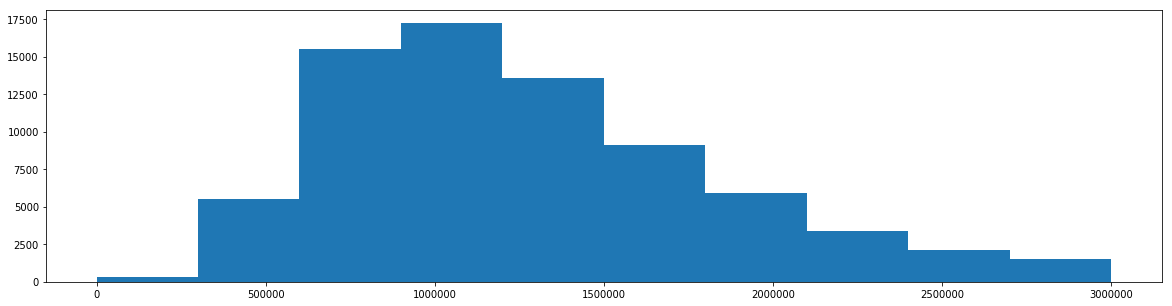

In [18]:
resize(x=20, y=5)
plt.hist(df["Annual Income"], range=[0,3000000])
plt.show()

After plotting the histogram with our own predefined range, we get a deeper look at the frequency distribution of income. We can probably still get some useful data from the higher-income data points, so let's stick to $2.5 million as our range.

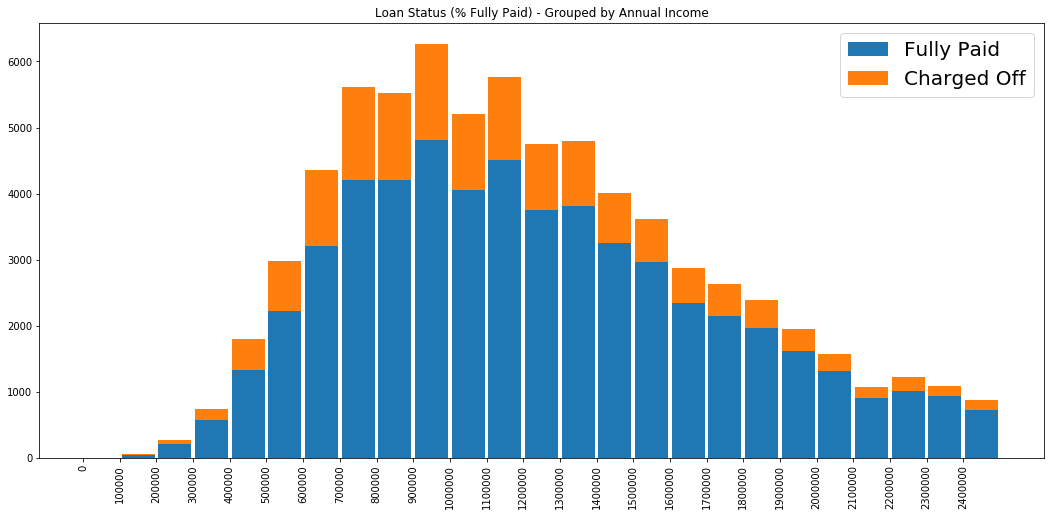

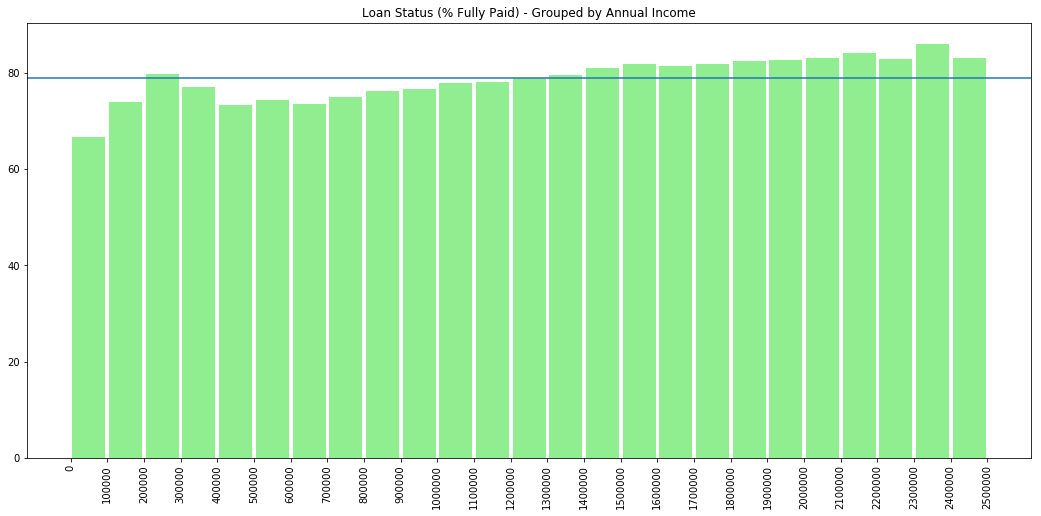

In [19]:
graph_grouped_column("Annual Income", min_value=0, max_value=2500000, 
                     binwidth=100000)

The graphs show that most of the loans were taken out in the income range from \$500,000 to \$1,500,000 -- however, just like with monthly debt, the fully-paid percentages are fairly consistent through income groups. There is a small increase in percent as income increases though.

### 3.2.4 Purpose

Next, we will look at Purpose vs. default rate. This one is slightly different, as it is not a continuous value, but rather several categories. 

We graph the counts of the categories:

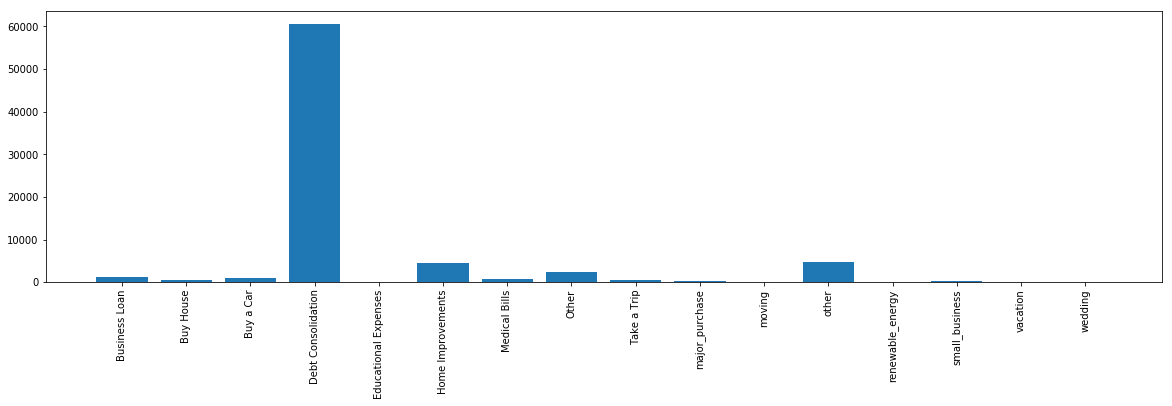

In [20]:
resize(x=20, y=5)
counts = df["Purpose"].value_counts()
plt.bar(counts.keys(), counts.values)
plt.xticks(rotation='vertical')
plt.show()

The majority of loans are taken out for debt consolidation. Let's see if the purpose has an effect on paying back the loan. Specifically, let's test the hypothesis of whether debt consolidation loans have a lower payback rate, since they are being taken out to pay other loans the lender has difficulty paying (creating a cycle).

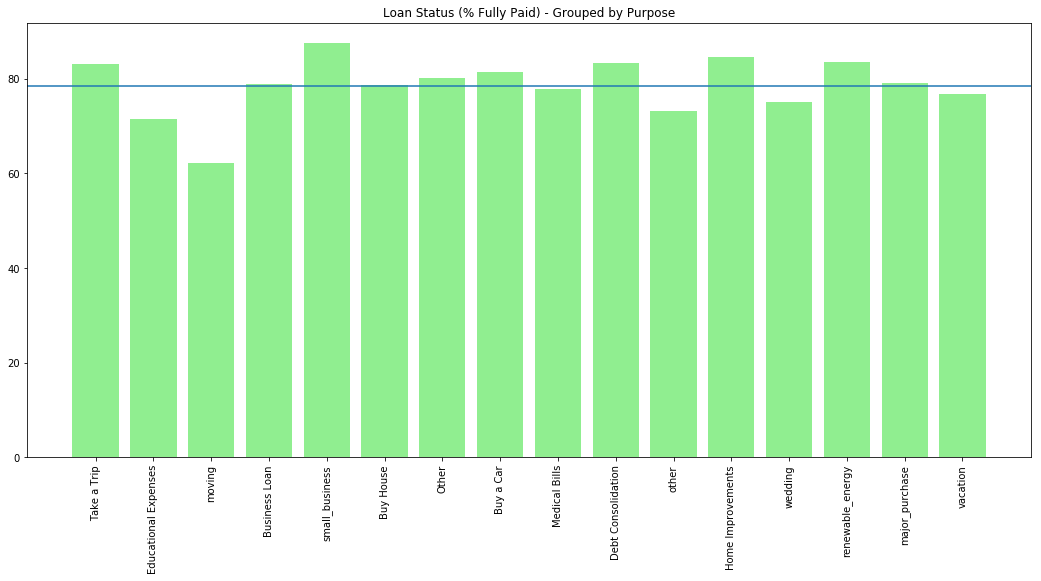

array(['Debt Consolidation', 'Home Improvements', 'Other',
       'major_purchase', 'Buy House', 'other', 'Take a Trip',
       'Medical Bills', 'Business Loan', 'vacation', 'Buy a Car', 'moving',
       'small_business', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

In [48]:
values = [df_paid["Purpose"].value_counts(), df["Purpose"].value_counts()]
bins = df["Purpose"].unique()

'''
Plot % Fully Paid grouped by Monthly Debt
'''
resize(y=8) 
percentages = [paid/total*100 for (paid, total) in zip(*values)]
plt.axhline(y=np.mean(percentages))
plt.bar(bins, percentages,color="lightgreen")
plt.title("Loan Status (% Fully Paid) - Grouped by {0}".format(column))
plt.xticks(bins, rotation='vertical')
plt.show()
bins

Graphing these two (fairly visually unappealing) graphs gives us little insight. It does tell us that our data's Purpose category is not that useful, since an overwhelming majority of the data is in the "Other" category. Regarding loans and loan statuses, fully-paid percentages are fairly similar across all purposes with a bit of variation. One (eyeball) outlier does seem to be Educational Expenses, however, with a rate of around 60%, about 10-15% lower than the other purposes. Perhaps student loans (assuming that's what Educational Expenses entail since unfortunately the dataset has no information on it) are less likely to be paid off, which makes sense considering the high cost of higher education.

# 4) Classification

Now the fun stuff! We can attempt to build a classifier on the data to predict, based on all the feature columns, whether a loan will be defaulted on. 

First, we must **prepare the data the classifier will train and test on**. 

We will use this [_excellent_ tutorial](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) from Machine Learning Mastery as a guide to how to build our models. In the tutorial, they train on the IRIS dataset, but the steps are directly applicable here as well. 

We are building a binary classifier to classify either the loan is **(0) "Fully Paid"** or **(1) "Charged Off"**. We can replace the text values with the binary values in the dataframe: 

In [21]:
df['Loan Status'].replace('Fully Paid', 0, inplace=True)
df['Loan Status'].replace('Charged Off', 1, inplace=True)

Next, we have a couple columns that don't have numerical data. For example, `Purpose` has 16 different textual categories, and `Term` is either "Short Term" or "Long Term". Since we can't use these textual values when training, we can create "dummies". 

By creating dummies, we create a new column for each different value of these category columns. Then, we assign a 1 under the respective category column the value originally had, and a 0 for all other columns. Pandas provides a simple function to do this for us: 

In [22]:
data_pd = pd.get_dummies(df)
data_pd.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,258082,746.0,950475.0,4,6748.42,11.5,720.0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,0,99999999,742.0,1230440.0,3,11073.96,26.8,720.0,11,0,...,0,0,0,0,0,0,0,0,0,0
3,0,260986,734.0,1314838.0,10,16325.94,30.3,720.0,7,0,...,0,0,0,0,0,0,0,0,0,0
6,0,353760,692.0,1202985.0,10,6115.15,13.8,720.0,10,0,...,0,0,0,0,0,0,0,0,0,0
7,0,31526,716.0,2065965.0,10,49927.44,15.1,5.0,22,0,...,0,0,0,0,0,0,0,0,0,0


Now, we can select the first column as the output we want to predict, and the rest of the columns as the features we will use to predict the output. Again, this is a simple operation, to form X and Y: the input and output sets, where each row in X corresponds to the same indexed row in Y. 

In [23]:
features = data_pd.columns.values
features = np.delete(features, 0)
target = data_pd["Loan Status"]
X = data_pd[features]
Y = data_pd['Loan Status']

After training the model, we will need to know if the model is accurate. Therefore, we need a testing datset of data the model has not seen before to evaluate its accuracy. It's important that we don't use training data to test the model, because the model is already biased to correctly classify the training data. 

Thefore, we will split the dataset into two datasets. We will randomly select 80% of the data to be the training dataset, and the remaining 20% will be the validation dataset. 

`sklearn` gives us a simple function to split the data for us: 

In [24]:
validation_size = 0.20
seed = 7
sets = model_selection.train_test_split(X, Y, 
                                        test_size=validation_size, 
                                        random_state=seed)

X_train, X_validation, Y_train, Y_validation = sets

X_train.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
79486,286880,747.0,526034.0,10,5966.00,16.5,720.0,5,0,245062,...,0,0,0,0,0,0,0,0,0,0
76882,401698,695.0,963680.0,6,27223.96,16.5,18.0,10,0,111910,...,0,0,0,0,0,0,0,0,0,0
27563,615252,709.0,1461252.0,8,17291.52,13.9,63.0,7,0,43776,...,0,0,0,0,0,0,0,0,0,0
42632,99999999,656.0,1066546.0,10,30663.34,15.5,29.0,9,0,92207,...,0,0,0,0,0,0,0,0,0,0
89908,613272,745.0,1212561.0,0,22028.22,32.7,18.0,12,0,405536,...,0,0,0,0,0,0,0,0,0,0


Now we will build the models. We will test 5 different algorithms to build our model, and determine which one is the best based on accuracy. 

The 5 algorithms are: 
- [Logistic Regression (LR)](https://onlinecourses.science.psu.edu/stat504/node/149)
- [Linear Discriminant Analysis (LDA)](http://sebastianraschka.com/Articles/2014_python_lda.html)
- [K-Nearest Neighbors (KNN)](https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/)
- [Classification and Regression Trees (CART)](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)
- [Gaussian Naive Bayes (NB)](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)

Each of the algorithms above are linked to a more in-depth explanation of them.

The first two are simple linear algorithms, while the last three are non-linear. We will soon see which one fares the best. 

We will proceed to build the 5 models, and use 10 fold cross validation to evaluate each one. 

Here is an detailed explanation of 10-fold Crossvalidation: https://www.openml.org/a/estimation-procedures/1

In [25]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.790491 (0.005517)
LDA: 0.790427 (0.005498)
KNN: 0.754789 (0.006645)
CART: 0.733192 (0.006882)
NB: 0.353759 (0.006612)


It looks like Logistic Regression and Linear Discriminant Analysis peformed the best, and Gaussian Naive Bayes was by far the worse. Since we did 10-fold cross validation, we have several accuracy measures for each algorithm, as it was evaluated 10 times. We can create a box-and-whisker plot to see the spread of accuracy for each algorithm:

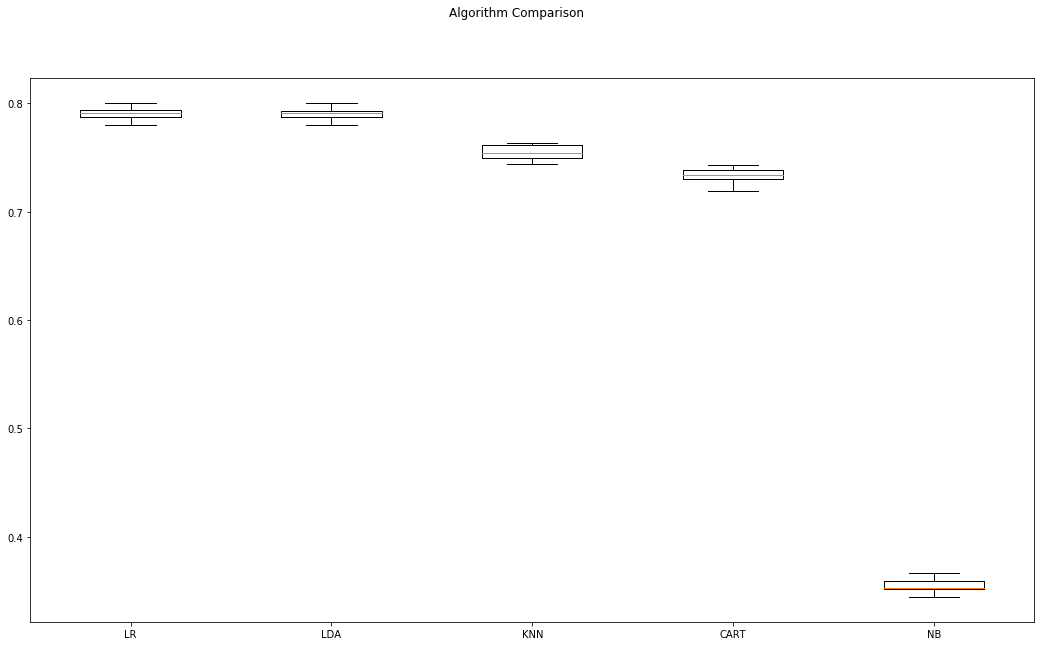

In [26]:
resize(y=10)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Let's go ahead and choose LDA as our model of choice, since it had a slightly smaller standard deviation and basically the same performance as LR. We can now determine the accuracy of this model:

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.789245502782
[[12188     3]
 [ 3254     9]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88     12191
          1       0.75      0.00      0.01      3263

avg / total       0.78      0.79      0.70     15454



We see that the accuracy was 78%! The model was slightly better at predicting "Fully Paid" than "Charged Off", and these aren't bad results for using a predefined algorithm part of scikit-learn. 

# 5) Conclusion and Summary

This exploration highlighted just the beginnning of an analysis into loan data with Python, Pandas, Numpy, and Scikit-Learn. We were able to visualize various insights, test multiple hypothesis, and eventually train multiple relatively accurate models to predict whether a lender will default on a loan given 16 standard features of a lender, and selected the Linear Discriminant Analysis as the model of choice. 

To learn more about the technologies used, and specifically about loan default predictions, please visit the following links: 

- Complete List of Pandas Tutorials: https://pandas.pydata.org/pandas-docs/stable/tutorials.html
- A gentle introduction to sklearn: https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
- UWashington Lecture on Predicting Loan Defaults: https://www.coursera.org/learn/ml-classification/lecture/ZtvkP/predicting-loan-defaults-with-decision-trees
- Winning Algorithm of a \$10,000 Kaggle Competition about predicing loan defaults (Used Pandas and Scikit-learn as well): https://github.com/songgc/loan-default-prediction
